In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from logistic_regression2 import LogisticRegression2
from sklearn.model_selection import train_test_split

In [2]:
data = datasets.load_digits()
mask = (data.target == 0) | (data.target == 1)

In [3]:
X = data['data'][mask]
y = data['target'][mask]
xtr, xte, ytr, yte = train_test_split(X, y, test_size=0.3, random_state=42)
print(type(xtr))

<class 'numpy.ndarray'>


In [4]:
n = 360
d = 64

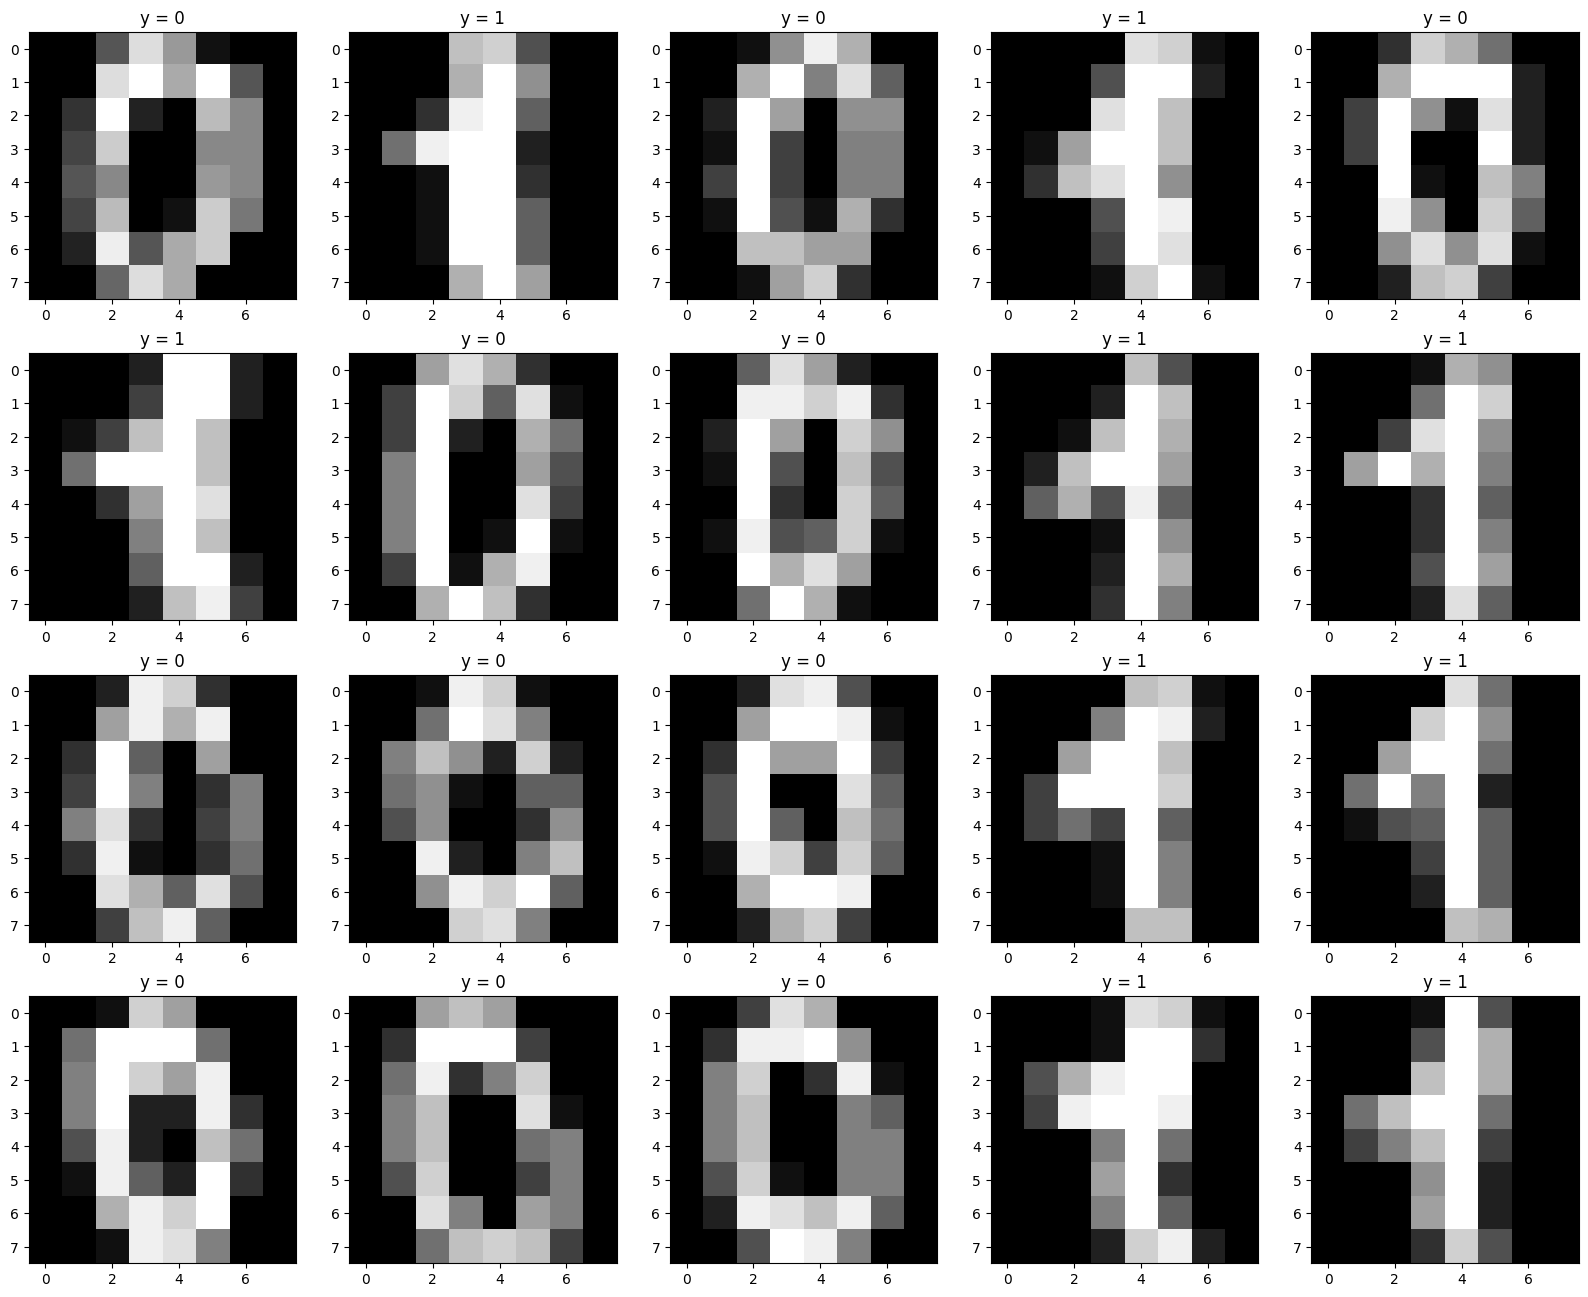

In [5]:
def draw_sample_label(X: np.ndarray , y: np.ndarray, size: int = 20, yred: np.ndarray = None):
    if size > len(y): 
        size = len(y)
    if size <= 0:
        print('Size is 0, done')
        return
    row = size // 5 if size % 5 == 0 else size // 5 + 1
    plt.subplots(row, 5, figsize=(20, 16))
    for i in range(size):
        plt.subplot(row, 5, i + 1)
        plt.imshow(X[i].reshape(8, 8), cmap='gray')
        if yred is None:
            plt.title(f'y = {y[i]}')
        else:
            plt.title(f'y = {y[i]}; yred = {yred[i]}')

draw_sample_label(X, y)

In [6]:
clf = LogisticRegression2(max_iter=10000)
clf.fit(xtr, ytr)

In [7]:
ypred = clf.predict(xte)

In [8]:
print((yte != ypred).sum())
print(f"error rate: {(yte!=ypred).sum() / len(yte) * 100} %")

1
error rate: 0.9259259259259258 %


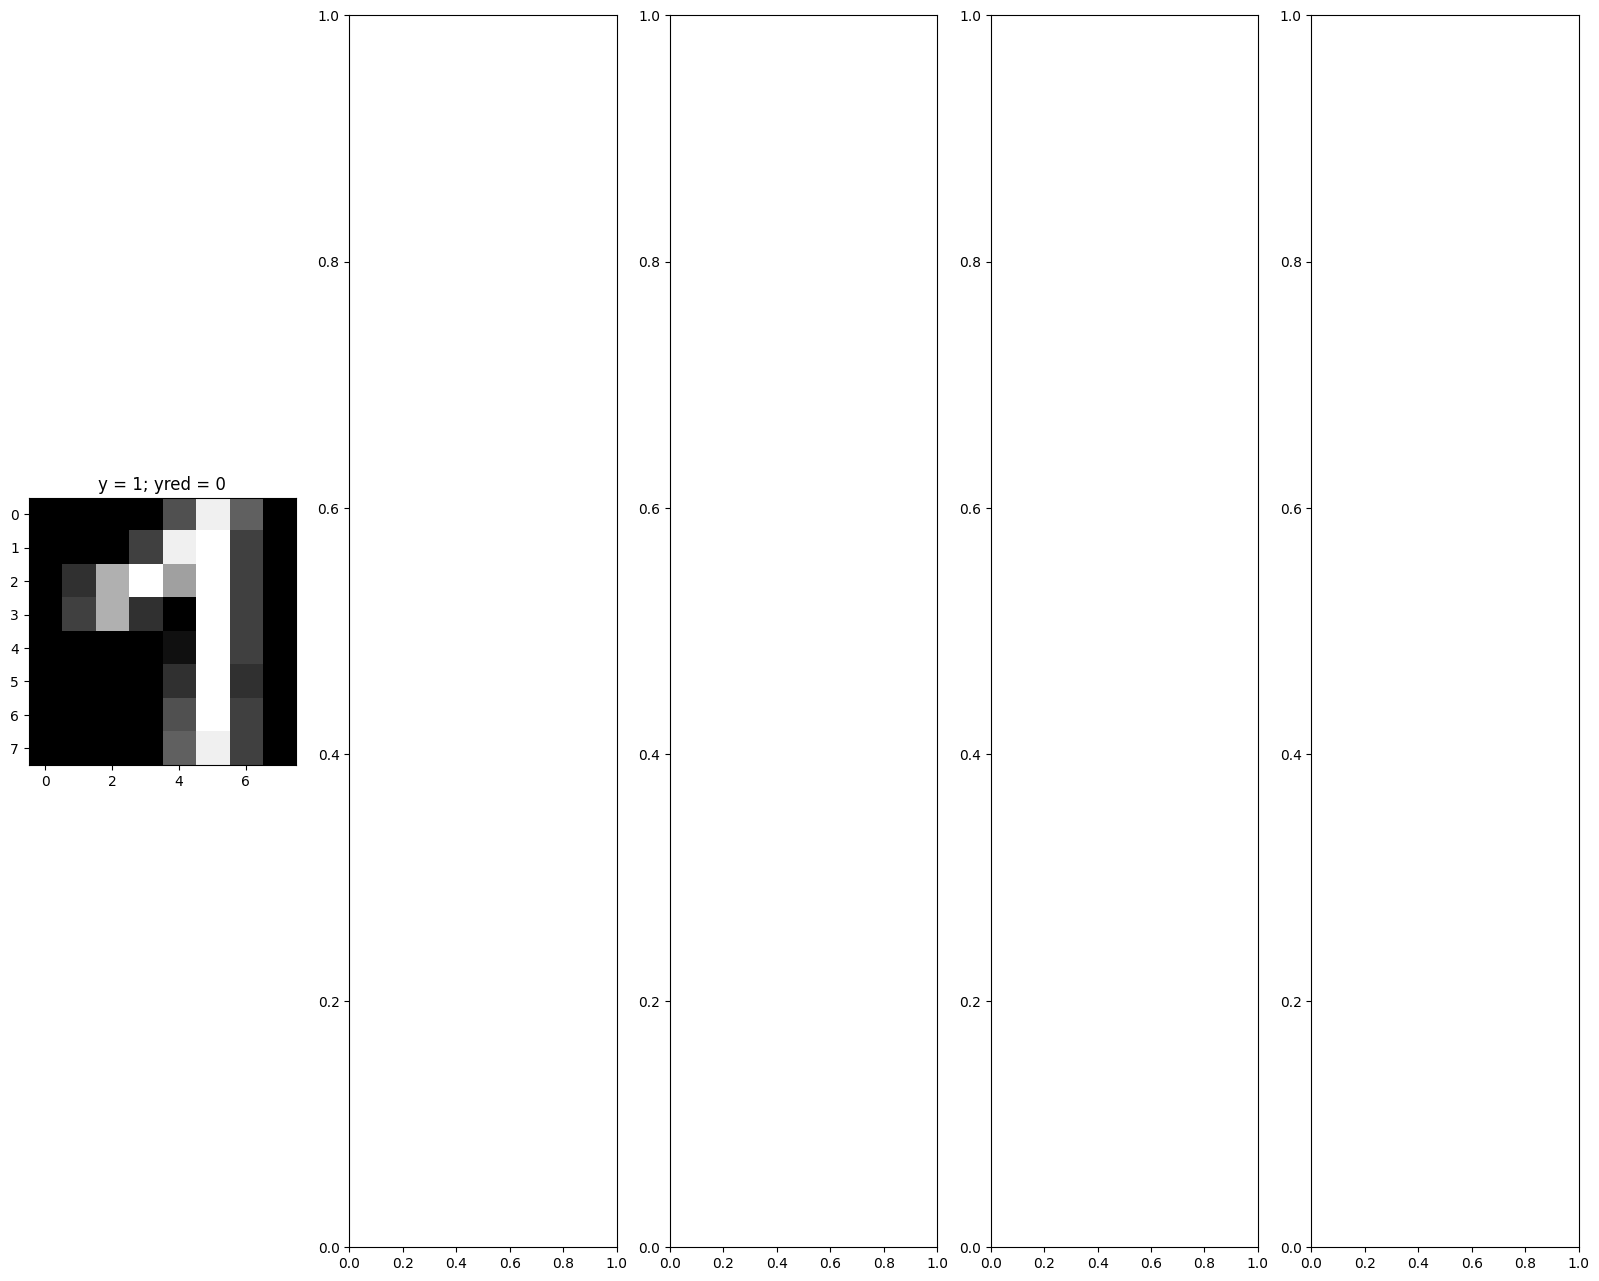

In [9]:
mask = yte != ypred
draw_sample_label(xte[mask], yte[mask], size = len(xte[mask]), yred=ypred[mask])